<a href="https://colab.research.google.com/github/Luiza-CR/chart-ibge/blob/main/colab_populacao_brasil_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

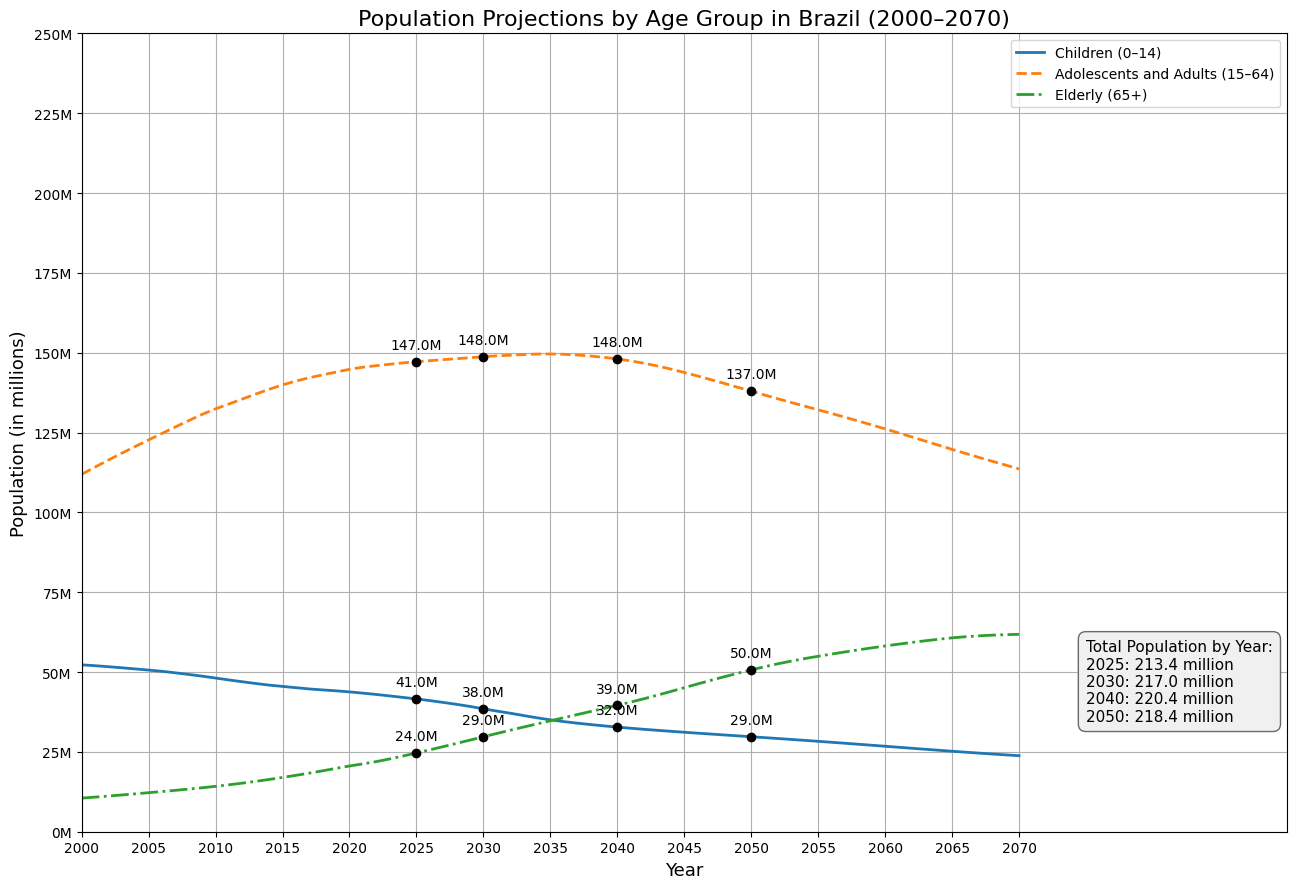

In [ ]:
# Population Projection by Age Group in Brazil (2000–2070)
# Rodável direto no Google Colab, com acesso público ao arquivo hospedado no GitHub

import pandas as pd
import matplotlib.pyplot as plt
import requests

# URL do arquivo hospedado no GitHub (substitua pela sua URL real)
url = "https://raw.githubusercontent.com/Luiza-CR/chart-ibge/main/projecoes_2024_tab3_grupos_etarios_especificos.xlsx"

# Baixar o arquivo Excel e salvar localmente
response = requests.get(url)
with open("dados_ibge.xlsx", "wb") as f:
    f.write(response.content)

# Carregar o arquivo Excel
xls = pd.ExcelFile("dados_ibge.xlsx")
df = pd.read_excel(xls, sheet_name='3) POP_GRUPO ETÁRIO ESPECÍFICO', skiprows=6)
df_brasil = df[df['SIGLA'] == 'BR']

# Processamento de colunas
cols = ['ANO', 'POP_T', 'P_0-14_T', 'P_15-64_T', 'P_65+_T']
df_selected = df_brasil[cols].copy()
df_selected.columns = ['Year', 'Total', 'Children_0_14', 'Adults_15_64', 'Elderly_65_plus']
df_selected = df_selected.astype({'Year': int, 'Total': int})
df_selected['Children_0_14'] = (df_selected['Children_0_14'] * df_selected['Total']).round().astype(int)
df_selected['Adults_15_64'] = (df_selected['Adults_15_64'] * df_selected['Total']).round().astype(int)
df_selected['Elderly_65_plus'] = (df_selected['Elderly_65_plus'] * df_selected['Total']).round().astype(int)

# Filtrar projeções até 2070
df_plot = df_selected[df_selected['Year'] <= 2070]
highlight_years = [2025, 2030, 2040, 2050]

# Plot
plt.figure(figsize=(15, 9))
plt.plot(df_plot['Year'], df_plot['Children_0_14'], label='Children (0–14)', linestyle='-', linewidth=2)
plt.plot(df_plot['Year'], df_plot['Adults_15_64'], label='Adolescents and Adults (15–64)', linestyle='--', linewidth=2)
plt.plot(df_plot['Year'], df_plot['Elderly_65_plus'], label='Elderly (65+)', linestyle='-.', linewidth=2)

# Adicionar bolinhas e valores por faixa etária
for year in highlight_years:
    row = df_plot[df_plot['Year'] == year].iloc[0]
    x = year
    for group, value, y_offset in [
        ('Children_0_14', row['Children_0_14'], 4_000_000),
        ('Adults_15_64', row['Adults_15_64'], 4_000_000),
        ('Elderly_65_plus', row['Elderly_65_plus'], 4_000_000),
    ]:
        y = row[group]
        plt.plot(x, y, 'o', color='black')
        plt.text(x, y + y_offset, f"{y//1_000_000:.1f}M", ha='center', fontsize=10)

# Legenda lateral estilizada com totais
totals_info = df_plot[df_plot['Year'].isin(highlight_years)][['Year', 'Total']]
box_text_lines = ["Total Population by Year:"]
for y, pop in zip(totals_info['Year'], totals_info['Total']):
    box_text_lines.append(f"{int(y)}: {pop/1_000_000:.1f} million")

# Monta o texto formatado
box_text = "\n".join(box_text_lines)

# Posição da caixa (x = 2075, y ajustado)
plt.text(
    2075,
    max(df_plot['Children_0_14']) + 8_000_000,
    box_text,
    fontsize=11,
    verticalalignment='top',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="#f0f0f0", edgecolor="dimgray")
)
# Ajustes finais do gráfico
plt.title("Population Projections by Age Group in Brazil (2000–2070)", fontsize=16)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population (in millions)", fontsize=13)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(range(2000, 2071, 5))
plt.yticks(
    ticks=range(0, 250_000_001, 25_000_000),
    labels=[f'{x//1_000_000}M' for x in range(0, 250_000_001, 25_000_000)]
)
plt.xlim(2000, 2090)
plt.show()


import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload do arquivo
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Leitura do Excel
xls = pd.ExcelFile(file_name)
df = pd.read_excel(xls, sheet_name='3) POP_GRUPO ETÁRIO ESPECÍFICO', skiprows=6)
df_brasil = df[df['SIGLA'] == 'BR']

# Seleção e cálculo
df_selected = df_brasil[['ANO', 'POP_T', 'P_0-14_T', 'P_15-64_T', 'P_65+_T']].copy()
df_selected.columns = ['Year', 'Total', 'Children_0_14', 'Adults_15_64', 'Elderly_65_plus']
df_selected = df_selected.astype({'Year': int, 'Total': int})
df_selected['Children_0_14'] = (df_selected['Children_0_14'] * df_selected['Total']).round().astype(int)
df_selected['Adults_15_64'] = (df_selected['Adults_15_64'] * df_selected['Total']).round().astype(int)
df_selected['Elderly_65_plus'] = (df_selected['Elderly_65_plus'] * df_selected['Total']).round().astype(int)

# Dados até 2070
df_plot = df_selected[df_selected['Year'] <= 2070]
highlight_years = [2025, 2030, 2040, 2050]

# Gráfico
plt.figure(figsize=(15, 9))

# Estilos distintos
plt.plot(df_plot['Year'], df_plot['Children_0_14'], label='Children (0–14)', linestyle='-', linewidth=2)
plt.plot(df_plot['Year'], df_plot['Adults_15_64'], label='Adolescents and Adults (15–64)', linestyle='--', linewidth=2)
plt.plot(df_plot['Year'], df_plot['Elderly_65_plus'], label='Elderly (65+)', linestyle='-.', linewidth=2)

# Anotações por faixa etária nas bolinhas
for year in highlight_years:
    row = df_plot[df_plot['Year'] == year].iloc[0]
    x = year

    # Bolinhas com valores individuais
    for group, value, y_offset in [
        ('Children_0_14', row['Children_0_14'], 4_000_000),
        ('Adults_15_64', row['Adults_15_64'], 4_000_000),
        ('Elderly_65_plus', row['Elderly_65_plus'], 4_000_000),
    ]:
        y = row[group]
        plt.plot(x, y, 'o', color='black')
        plt.text(x, y + y_offset, f"{y//1_000_000:.1f}M", ha='center', fontsize=10)

# Caixa com total populacional ao lado do gráfico
totals_info = df_plot[df_plot['Year'].isin(highlight_years)][['Year', 'Total']]
text_lines = [f"{int(y)}: {pop/1_000_000:.1f}M" for y, pop in zip(totals_info['Year'], totals_info['Total'])]
box_text = "📊 Total Population\n" + "\n".join(text_lines)

# Posicionar o quadro fora da área do gráfico
plt.text(2075, max(df_plot['Children_0_14']) + 8_000_000, box_text,
         bbox=dict(facecolor='lightgray', edgecolor='black'), fontsize=11, verticalalignment='top')

# Ajustes finais
plt.title("Population Projections by Age Group in Brazil (2000–2070)", fontsize=16)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Population (in millions)", fontsize=13)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(range(2000, 2071, 5))
plt.yticks(
    ticks=range(0, 250_000_001, 25_000_000),
    labels=[f'{x//1_000_000}M' for x in range(0, 250_000_001, 25_000_000)]
)
plt.xlim(2000, 2090)  # espaço à direita para o quadro
plt.show()
